# Pré-traitement des données d'entrée du modèle

In [1]:
import numpy as np
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

## Normalisation

Certains modèles font des hypothèses sur la distribution des données d'entrée. En particulier ils peuvent supposer que la variance de toutes les variables sont du même ordre de grandeur pour fonctionner correctement.  
C'est en particulier le cas des machines à vecteurs de support (*support vector machines* ou SVM) qui seront utilisées dans cette section.

Les données support de cette partie sont des mesures réalisées sur des tumeurs afin de détecter un éventuel cancer du sein.  
La description du jeu de données est fournie dans l'élément `DESCR` du dictionnaire (`data`).  
En particulier, cette description donnes des informations de dispersion des mesures (le min et le max pour chaque variable).

In [2]:
from sklearn import datasets

data = datasets.load_breast_cancer()
X_np, y = data.data, data.target_names[data.target]
X = pd.DataFrame(X_np, columns=data["feature_names"])
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Comme souvent en apprentissage automatique, le jeu de données annoté est séparé en deux : un jeu de données d'entrainement (75%) et un jeu de données de validation (25%), servant à évaluer le pouvoir prédictif du modèle.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

**Question** : Entraîner un classificateur à vecteurs de support ([classe `SVC` de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) sur le jeu de données d'entraînement, puis afficher les deux matrices de confusion : une pour les données de test et une pour les données d'entrainement.

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Éventuellement pour vous simplifier la vie, il n'est pas obligatoire d'utiliser cette fonction.
def plot_confusion_matrix(y_test_true, y_test_pred, y_train_true, y_train_pred):
    """Display confusion matrices side-by-side."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    for y_true, y_pred, ax, title in [
        (y_test_true, y_test_pred, ax1, "Test data"),
        (y_train_true, y_train_pred, ax2, "Train data"),
    ]:
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
        ax.set_title(title)

In [6]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

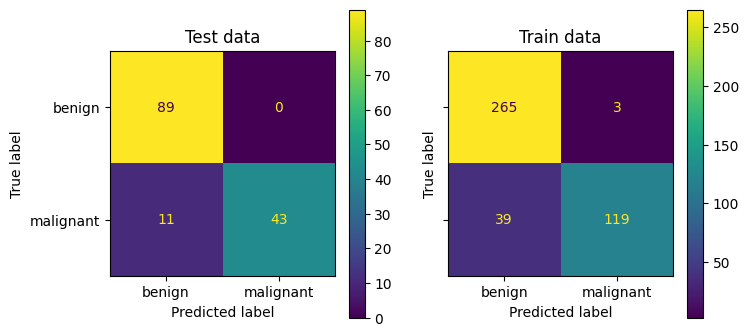

In [7]:
plot_confusion_matrix(y_test, clf.predict(X_test), y_train, clf.predict(X_train))

Nous allons ensuite tenter d'améliorer la performance du modèle en normalisant les données d'entrée.

**Question** : Est-il souhaitable de réaliser cette normalisation sur l'ensemble du jeu de données original ?

**Question** : Réaliser une transformation des données d'entrée pour les mettre à une échelle [0, 1] ([classe `MinMaxScaler` de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)).

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()  # clip=True
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Question** : Quelles sont les plages de valeurs des données d'entrainement transformées ?  
Sont-elles dans l'intervalle [0, 1] ?

In [10]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.351764,0.311432,0.338881,0.218544,0.396210,0.249274,0.211765,0.247548,0.382924,0.274185,...,0.297793,0.356925,0.284629,0.171571,0.344326,0.235867,0.217412,0.397365,0.261201,0.243111
std,0.173553,0.153656,0.170511,0.148291,0.128098,0.167441,0.188821,0.193805,0.145657,0.157131,...,0.173031,0.169711,0.168472,0.140433,0.164798,0.169938,0.164954,0.225992,0.124184,0.146585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225990,0.197578,0.213787,0.112725,0.305430,0.126098,0.070560,0.103902,0.280682,0.161594,...,0.177428,0.231984,0.166131,0.079600,0.226049,0.117736,0.094728,0.224330,0.180170,0.133732
50%,0.318704,0.294810,0.303403,0.177158,0.395369,0.213986,0.149039,0.168588,0.369697,0.242523,...,0.253291,0.344804,0.238608,0.126217,0.336871,0.193354,0.180950,0.343093,0.245121,0.212233
75%,0.447380,0.398443,0.435923,0.278346,0.475038,0.325729,0.297739,0.371074,0.456313,0.348989,...,0.391587,0.468084,0.379451,0.221638,0.440293,0.324246,0.307748,0.557474,0.312438,0.314068
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Question** : Quelles sont les plages de valeurs des données de test transformées ?  
Sont-elles dans l'intervalle [0, 1] ?

In [11]:
X_test_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.343314,0.298938,0.330032,0.212082,0.390538,0.228655,0.197017,0.229996,0.369718,0.259042,...,0.293296,0.352968,0.278696,0.168927,0.361160,0.235784,0.217377,0.383324,0.269582,0.250818
std,0.169435,0.133467,0.168051,0.152592,0.123880,0.159603,0.180779,0.190070,0.114236,0.119915,...,0.169206,0.154483,0.164474,0.138901,0.164911,0.193092,0.172127,0.226027,0.115249,0.171522
min,0.060570,-0.023183,0.066243,0.025620,0.089194,-0.022327,0.000000,0.000000,0.139899,0.012216,...,0.036357,-0.012686,0.031077,0.013493,-0.093278,-0.017862,0.000000,0.000000,0.016361,0.001780
25%,0.239689,0.209516,0.229299,0.122418,0.300713,0.100376,0.062231,0.088419,0.291667,0.177864,...,0.189079,0.234548,0.173066,0.085271,0.244820,0.092642,0.087540,0.218213,0.194264,0.146066
50%,0.293508,0.284429,0.281532,0.158261,0.388463,0.192819,0.137254,0.162972,0.370202,0.246420,...,0.231590,0.353576,0.223517,0.110377,0.376940,0.185138,0.183546,0.348797,0.251528,0.207189
75%,0.414844,0.371972,0.406051,0.254252,0.482712,0.325964,0.309278,0.338121,0.450505,0.318976,...,0.373888,0.455601,0.368992,0.209349,0.457079,0.338274,0.297724,0.551203,0.327912,0.311334
max,1.033759,0.654325,1.011180,0.999152,0.678613,0.752587,0.825445,0.916998,0.747475,0.687658,...,0.821060,0.760864,0.803277,0.726947,0.745145,1.134245,0.882588,0.985223,0.709836,1.292472


**Question** : Réaliser un nouvel entraînement sur les données transformées et afficher les matrices de confusion correspondantes.  
Le résultat a-t-il changé par rapport au modèle précédent, entraîné sur les données brutes ?

In [12]:
clf = SVC()
clf.fit(X_train_scaled, y_train)

SVC()

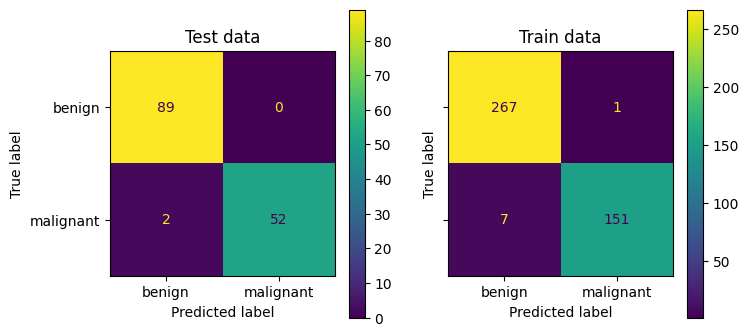

In [13]:
plot_confusion_matrix(y_test, clf.predict(X_test_scaled), y_train, clf.predict(X_train_scaled))

**Question** Reprendre les quatre questions précédentes en limitant les valeurs de sortie du prétraitement : `MinMaxScaler(clip=True)`.  
Cette modification a-t-elle un impact sur la précision du modèle ?

## Séquences de traitements (*pipelines*)

Dans la section précédente, nous avons réalisé une partie des prétraitements sur le jeu d'entraînement (`fit` et `transform`) et une autre sur le jeu de validation (`transform` uniquement), puis la même chose pour le classificateur (`fit` et `predict`, ou uniquement `predict`). Avec scikit-learn, il est possible de définir des [séquences de traitements](https://scikit-learn.org/stable/modules/compose.html) dont l'entraînement est ensuite commun.  
Cela permet en particulier d'éviter que des informations statistiques issues des données de test ne soient utilisées pour l'entraînement. Ce sera particulièrement utile dans la suite du cours pour réaliser une validation croisée ou optimiser les hyper-paramètres d'un modèle.

**Question** : Définir une pipeline intégrant la normalisation et la classification, puis vérifier que vous obteniez bien les mêmes résultats que précédemment.

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('classifier', SVC())
])

In [16]:
# Réalise l'entraînement pour le MinMaxScaler et le SVC
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('classifier', SVC())])

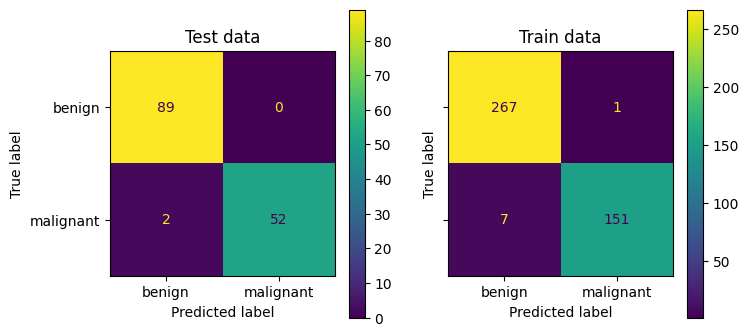

In [17]:
plot_confusion_matrix(y_test, pipeline.predict(X_test), y_train, pipeline.predict(X_train))

**Question** : Vérifier que la standardisation ne s'est bien basée que sur les données d'entraînement.  
Pour cela, il est possible d'extraire un estimateur correspondant à une sous-chaîne de traitement. Ici, on prendra l'unique étape de prétraitement, c'est-à-dire `pipeline[0]`, ou, plus généralement, `pipeline[:-1]` (toutes les étapes sauf la dernière).

In [18]:
preprocessing = pipeline[:-1]
preprocessing.transform(X_test).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.343314,0.298938,0.330032,0.212082,0.390538,0.228655,0.197017,0.229996,0.369718,0.259042,...,0.293296,0.352968,0.278696,0.168927,0.361160,0.235784,0.217377,0.383324,0.269582,0.250818
std,0.169435,0.133467,0.168051,0.152592,0.123880,0.159603,0.180779,0.190070,0.114236,0.119915,...,0.169206,0.154483,0.164474,0.138901,0.164911,0.193092,0.172127,0.226027,0.115249,0.171522
min,0.060570,-0.023183,0.066243,0.025620,0.089194,-0.022327,0.000000,0.000000,0.139899,0.012216,...,0.036357,-0.012686,0.031077,0.013493,-0.093278,-0.017862,0.000000,0.000000,0.016361,0.001780
25%,0.239689,0.209516,0.229299,0.122418,0.300713,0.100376,0.062231,0.088419,0.291667,0.177864,...,0.189079,0.234548,0.173066,0.085271,0.244820,0.092642,0.087540,0.218213,0.194264,0.146066
50%,0.293508,0.284429,0.281532,0.158261,0.388463,0.192819,0.137254,0.162972,0.370202,0.246420,...,0.231590,0.353576,0.223517,0.110377,0.376940,0.185138,0.183546,0.348797,0.251528,0.207189
75%,0.414844,0.371972,0.406051,0.254252,0.482712,0.325964,0.309278,0.338121,0.450505,0.318976,...,0.373888,0.455601,0.368992,0.209349,0.457079,0.338274,0.297724,0.551203,0.327912,0.311334
max,1.033759,0.654325,1.011180,0.999152,0.678613,0.752587,0.825445,0.916998,0.747475,0.687658,...,0.821060,0.760864,0.803277,0.726947,0.745145,1.134245,0.882588,0.985223,0.709836,1.292472


## Gestion des valeurs manquantes

Votre assistant a malencontreusement perdu les mesures de valeur moyenne et de pire tumeur pour un quart des patients (il ne lui reste que les mesures d'écart type, soit un tiers des variables d'entrée).

In [19]:
missing_cols = [col for col in X.columns if "mean" in col or "worst" in col]
print(f"Deleted columns: {missing_cols} ({len(missing_cols)/len(X.columns):.2%} of features)")
X_missing = X.copy()
missing_idx = X_missing.sample(frac=0.25).index
X_missing.loc[missing_idx, missing_cols] = np.nan

Deleted columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'] (66.67% of features)


In [20]:
X_missing.iloc[:, :15].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.108712,19.381007,91.806393,653.429040,0.096023,0.102618,0.086898,0.048495,0.179928,0.062612,0.405172,1.216853,2.866059,40.337079,0.007041
std,3.540055,4.374201,24.382255,353.994596,0.013585,0.051554,0.077833,0.038827,0.027216,0.006843,0.277313,0.551648,2.021855,45.491006,0.003003
min,7.691000,10.380000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,11.615000,16.210000,74.685000,412.550000,0.085825,0.063750,0.028010,0.020310,0.161350,0.057695,0.232400,0.833900,1.606000,17.850000,0.005169
50%,13.240000,18.940000,85.690000,538.700000,0.095920,0.093620,0.061810,0.032790,0.178400,0.061400,0.324200,1.108000,2.287000,24.530000,0.006380
75%,15.780000,21.840000,104.450000,781.800000,0.104900,0.128300,0.125050,0.070395,0.194850,0.065795,0.478900,1.474000,3.357000,45.190000,0.008146
max,28.110000,33.810000,188.500000,2499.000000,0.142500,0.345400,0.410800,0.191300,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


In [21]:
X_train_m, X_test_m, y_train, y_test = train_test_split(X_missing, y, random_state=123)
print(f"{len(set(X_train_m.index).intersection(missing_idx))/len(X_train_m):.2%} of the train dataset has missing values, "
      f"{len(set(X_test_m.index).intersection(missing_idx))/len(X_test_m):.2%} of the test dataset has missing values.")

25.35% of the train dataset has missing values, 23.78% of the test dataset has missing values.


La grande majorité des modèles de scikit-learn ne supportent pas les valeurs manquantes (comme généralement en apprentissage automatique).  
**Question** : Vérifier si votre chaîne de traitement est compatible avec les nouvelles données d'entrée.

In [22]:
# Doit donner une erreur, car le modèle précédent n'accepte pas les données manquantes
pipeline.fit(X_train_m, y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Question** : Définir une nouvelle chaine de traitements permettant de prendre en compte l'absence de valeurs renseignées.  
Vous avez pour cela trois grands types de stratégies :
- ignorer les colonnes en question (pour appliquer des traitements spécifiques à des colonnes, vous pouvez utiliser [la classe `ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html))
- remplacer les valeurs manquantes par des valeurs typiques (voir [la classe `SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- remplacer les valeurs manquantes par des valeurs estimées par un autre modèle (par exemple, en se basant sur les [mesures les plus proches](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html))

Stratégie 1 : ignorer les colonnes avec valeurs manquantes

Première version avec prétraitement en pandas, vu que les colonnes sont fixes et connues à l'avance.

In [23]:
pipeline.fit(X_train_m.drop(columns=missing_cols), y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('classifier', SVC())])

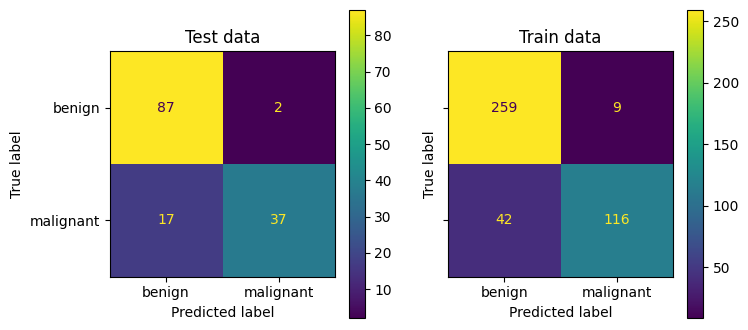

In [24]:
plot_confusion_matrix(y_test, pipeline.predict(X_test_m.drop(columns=missing_cols)), y_train, pipeline.predict(X_train_m.drop(columns=missing_cols)))

On obtient exactement le même résultat avec une transformation intégrée à la pipeline.

In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
pipeline = Pipeline([
    ('imputer', ColumnTransformer(
        transformers=[
            ("missing", "drop", missing_cols),
        ],
        remainder="passthrough",
    )),
    ('scale', MinMaxScaler()),
    ('classifier', SVC())
])

In [27]:
pipeline.fit(X_train_m, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('missing', 'drop',
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('scale', MinMaxScaler()), ('classifier', SVC())])

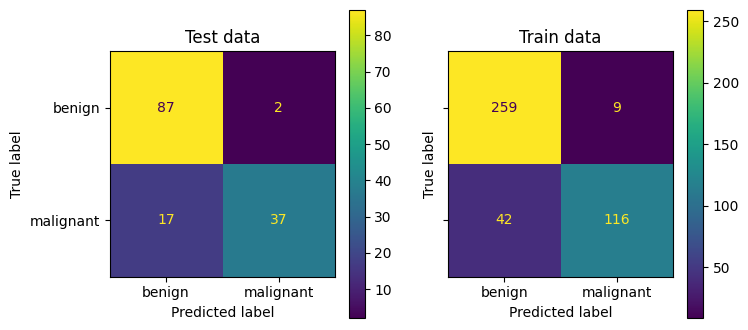

In [28]:
plot_confusion_matrix(y_test, pipeline.predict(X_test_m), y_train, pipeline.predict(X_train_m))

Stratégie 2 : remplacer les valeurs manquantes par une valeur typique (la moyenne par défaut)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scale', MinMaxScaler()),
    ('classifier', SVC())
])

In [31]:
pipeline.fit(X_train_m, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scale', MinMaxScaler()),
                ('classifier', SVC())])

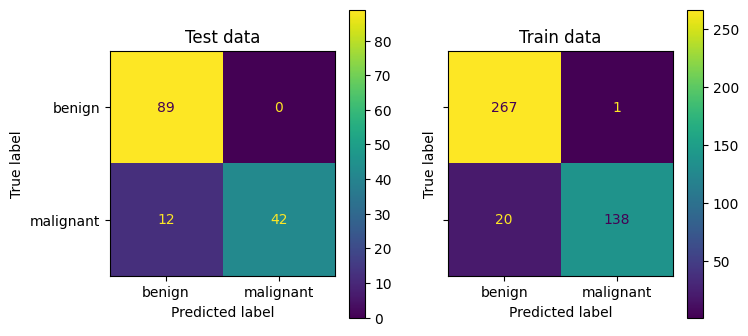

In [32]:
plot_confusion_matrix(y_test, pipeline.predict(X_test_m), y_train, pipeline.predict(X_train_m))

Stratégie 3 : utiliser un modèle pour estimer les valeurs manquantes

In [33]:
from sklearn.impute import KNNImputer

In [34]:
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scale', MinMaxScaler()),
    ('classifier', SVC())
])

In [35]:
pipeline.fit(X_train_m, y_train)

Pipeline(steps=[('imputer', KNNImputer()), ('scale', MinMaxScaler()),
                ('classifier', SVC())])

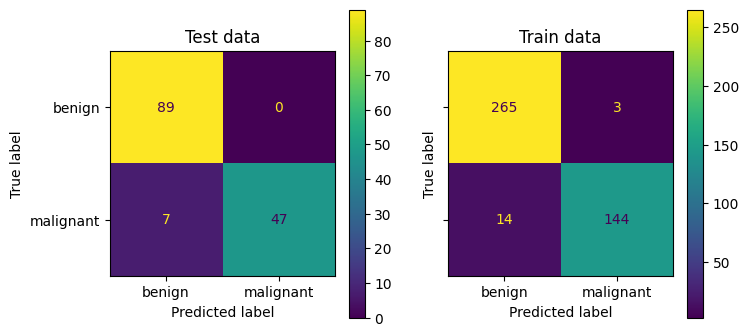

In [36]:
plot_confusion_matrix(y_test, pipeline.predict(X_test_m), y_train, pipeline.predict(X_train_m))

## Données catégorielles

Les modèles d'apprentissage automatique attendent en entrée des vecteurs numériques de taille fixe. Il est donc nécessaire de transformer les entrées catégorielles, surtout si elles sont représentées par des chaînes de caractères.

In [37]:
X = pd.DataFrame({"pets": ["dog", "cat", "snake", "dog", "goldfish", "dog"]})
X_train = X[:4]
X_test = X[4:]

In [38]:
display(X_train)
display(X_test)

,pets
0,dog
1,cat
2,snake
3,dog


,pets
4,goldfish
5,dog


### One hot encoding

Une manière de réaliser ce type de transformation consiste à générer autant de variables booléennes qu'il existe de catégories. On obtient donc en sortie du traitement, pour *n* catégories, un vecteur de taille *n*, avec la valeur 1 pour la colonne correspondant à la catégorie de l'observation et 0 partout ailleurs.  
Cette transformation est désignée comme un encodage un parmi n, ou *one-hot encoding* en anglais.

La bibliothèque pandas propose [la méthode `get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) pour réaliser ce type de traitement.

In [39]:
pd.get_dummies(X)

,pets_cat,pets_dog,pets_goldfish,pets_snake
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0


**Question** : Pourquoi n'est-il pas correct de réaliser ce type de prétraitement globalement ?

**Question** : Utiliser [la classe `OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) (avec, entre autres, l'option `sparse_output=False`) pour réaliser le prétraitement.  
Visualiser les données d'entrainement et de test après transformation.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [42]:
encoder.transform(X_train)

,pets_cat,pets_dog,pets_snake
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0


In [43]:
encoder.transform(X_test)

,pets_cat,pets_dog,pets_snake
4,0.0,0.0,0.0
5,0.0,1.0,0.0


### Ordinal encoder

Pour transformer les valeurs catégorielles en valeurs numériques, il est aussi possible de passer par une représentation entière, discrète elle aussi, à l'aide de [la classe `OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).  
Attention cependant à son utilisation, car de nombreux modèles vont alors supposer qu'il existe un ordre intrinsèque aux catégories, ce qui peut dégrader significativement leur performance.

**Question** : Réaliser un encodage ordinal des données catégorielles et visualiser les données après transformation.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
encoder.fit(X_train)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [46]:
encoder.transform(X_train)

,pets
0,1.0
1,0.0
2,2.0
3,1.0


In [47]:
encoder.transform(X_test)

,pets
4,-1.0
5,1.0


### MultiLabelBinarizer

Dans certains cas, les catégories peuvent ne pas avoir de valeur unique. C'est-à-dire que chaque observation peut être associée à zéro, une ou plusieurs catégories.

In [48]:
X = pd.DataFrame({"pets": [{"cat", "dog"}, {"cat"}, {"snake", "dog"}, {"unicorn", "cat"}, {"goldfish"}, {"cat", "dog", "snake"}]})
X_train = X[:3]
X_test = X[3:]

In [49]:
display(X_train)
display(X_test)

,pets
0,"{dog, cat}"
1,{cat}
2,"{dog, snake}"


,pets
3,"{unicorn, cat}"
4,{goldfish}
5,"{dog, cat, snake}"


**Question** : Donner (sans automatiser le traitement) un exemple de résultat attendu après transformation.

Scikit-learn n'intègre pas directement d'outil permettant de réaliser ce type de transformation sur les entrées du modèle.  
La transformation la plus proche est un traitement réalisé sur du texte à l'aide de [la classe `CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), où le nombre d'occurrences de chaque mot est compté.  
Il existe quelques différences notables par rapport aux transformations utilisées jusqu'à présent :
- `CountVectorizer` n'accepte qu'une seule colonne en entrée.
- La sortie est une matrice creuse ([*sparse* de scipy](https://docs.scipy.org/doc/scipy/reference/sparse.html)), qui doit être convertie en matrice dense à l'aide de la méthode `todense` pour être compatible avec pandas.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
encoder = CountVectorizer(analyzer=set)
encoder.fit(X_train["pets"])

CountVectorizer(analyzer=<class 'set'>)

In [52]:
pd.DataFrame(encoder.transform(X_train["pets"]).todense(), columns=encoder.get_feature_names_out())

,cat,dog,snake
0,1,1,0
1,1,0,0
2,0,1,1


In [53]:
pd.DataFrame(encoder.transform(X_test["pets"]).todense(), columns=encoder.get_feature_names_out())

,cat,dog,snake
0,1,0,0
1,0,0,0
2,1,1,1


Alternativement, il est (relativement) facile de définir vos propres classes de transformation compatibles avec scikit-learn.

**Question** : Implémenter un transformateur permettant de convertir des listes de catégories en matrices binaires indiquant la présence ou non de chaque catégorie.

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class BinaryEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories = {}
        for col in X:
            categories = set()
            for x in X[col]:
                categories = categories.union(x)
            self.categories[col] = list(categories)
        return self

    def get_feature_names_out(self, input_features=None):
        names = []
        for col, categories in self.categories.items():
            names += [col + "_" + cat for cat in categories]
        return names

    def transform(self, X, y=None):
        transformed = {}
        for col in X:
            transformed[col] = np.empty((len(X), len(self.categories[col])), dtype=np.int8)
            for i, x in enumerate(X[col]):
                transformed[col][i, :] = [1 if c in x else 0 for c in self.categories[col]]
        return np.concatenate(list(transformed.values()), axis=1)

In [55]:
encoder = BinaryEncoder()

In [56]:
encoder.fit(X_train)

BinaryEncoder()

In [57]:
encoder.transform(X_train)

,pets_dog,pets_cat,pets_snake
0,1,1,0
1,0,1,0
2,1,0,1


In [58]:
encoder.transform(X_test)

,pets_dog,pets_cat,pets_snake
3,0,1,0
4,0,0,0
5,1,1,1


## Génération d'entrées complémentaires

Il est possible d'utiliser les transformateurs pour générer des entrées complémentaires. En particulier, scikit-learn n'intègre pas de régression polynomiale, car il est possible d'arriver au même résultat par prétraitement des entrées.  
Dans cette section, nous allons chercher à modéliser des données générées par un polynôme d'ordre deux (avec une seule dimension ici pour simplifier la visualisation, mais cela s'applique aussi à plusieurs dimensions).

In [59]:
X = np.random.uniform(size=100)
y = 3 - (X - 0.2)**2 + np.random.normal(scale=0.02, size=100)
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

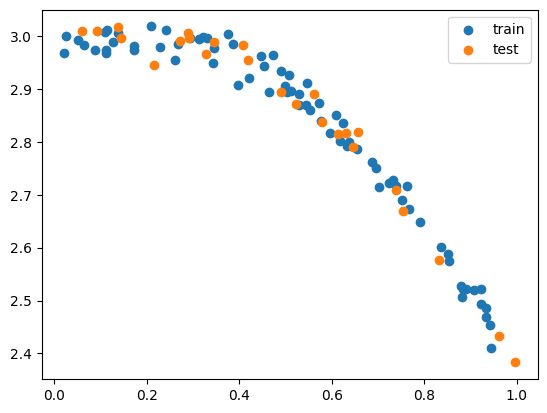

In [60]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.legend()
plt.show()

**Question** : Utiliser un modèle de régression linéaire (voir [la classe `LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) pour ce problème de régression.  
Visualiser les prédictions.

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

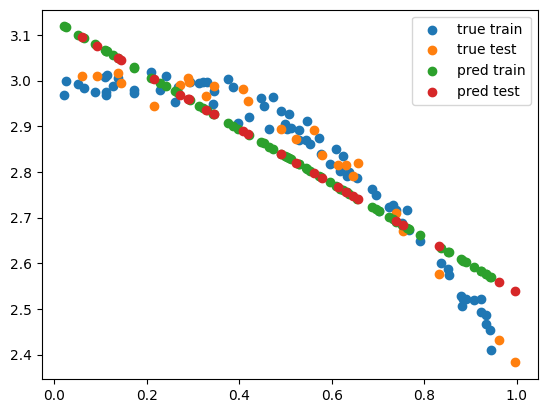

In [63]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
plt.scatter(X_train, y_train, label="true train")
plt.scatter(X_test, y_test, label="true test")
plt.scatter(X_train, y_train_pred, label="pred train")
plt.scatter(X_test, y_test_pred, label="pred test")
plt.legend()
plt.show()

**Question** : Utiliser [la classe `PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) pour générer des combinaisons polynomiales, de degré 2 ou plus, des entrées.  
Visualiser les prédictions.

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pipeline = Pipeline([
    ('generator', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('generator', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [66]:
# Données d'entrée originales
X_test

array([[0.05971216],
       [0.57957136],
       [0.73781957],
       [0.32767873],
       [0.63142866],
       [0.21570602],
       [0.3449836 ],
       [0.4188041 ],
       [0.753116  ],
       [0.61388631],
       [0.27194935],
       [0.96156001],
       [0.28858687],
       [0.52328549],
       [0.64641037],
       [0.49025613],
       [0.99628185],
       [0.40705664],
       [0.65748802],
       [0.13694404],
       [0.14334081],
       [0.83096812],
       [0.09264719],
       [0.29010811],
       [0.56189194]])

In [67]:
# Données d'entrée transformées
pipeline[:-1].transform(X_test)

,1,x0,x0^2
0,1.0,0.059712,0.003566
1,1.0,0.579571,0.335903
2,1.0,0.737820,0.544378
3,1.0,0.327679,0.107373
4,1.0,0.631429,0.398702
5,1.0,0.215706,0.046529
6,1.0,0.344984,0.119014
7,1.0,0.418804,0.175397
8,1.0,0.753116,0.567184
9,1.0,0.613886,0.376856


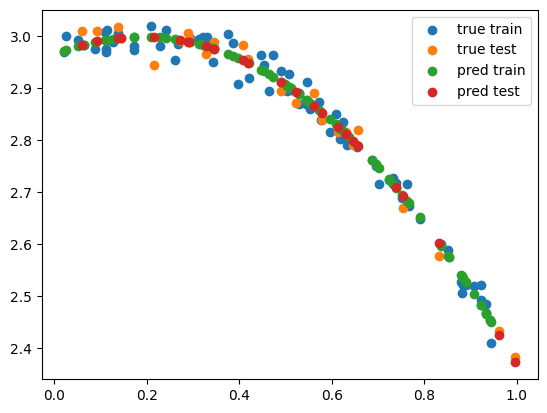

In [71]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
plt.scatter(X_train, y_train, label="true train")
plt.scatter(X_test, y_test, label="true test")
plt.scatter(X_train, y_train_pred, label="pred train")
plt.scatter(X_test, y_test_pred, label="pred test")
plt.legend()
plt.show()

In [69]:
print(f"Equation du modèle linéaire : {' + '.join([f'{pipeline[-1].intercept_:.3}'] + list(f'{c:.3}x^{i}' for i, c in enumerate(pipeline[-1].coef_)))}")
print("L'équation originale est : 3 - (x - 0.2)^2 = 2.96 + 0.2x - x^2")

Equation du modèle linéaire : 2.96 + 0.0x^0 + 0.365x^1 + -0.962x^2
L'équation originale est : 3 - (x - 0.2)^2 = 2.96 + 0.2x - x^2


## Pipelines ou non ?

**Question** : Parmi toutes les transformations vues dans ce TD, lesquelles peuvent être appliquées au préalable sur l'ensemble du jeu de données ? Pourquoi ?